# Main

 THis analysis is for *South Australia*

## Filter times

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import ancil_load
import datetime as dt
ancil_load=reload(ancil_load)

# From Analytics PCA

In [54]:
df_all_ancil,price = ancil_load.SA_production_price()
df_all_ancil["index"]=df_all_ancil.index
df_all_ancil=df_all_ancil.drop_duplicates("index")
df_all_ancil=df_all_ancil.drop("index",axis=1)
df_all_ancil=df_all_ancil.fillna(0)

price=pd.DataFrame(price)
price["index"]=price.index
price=price.drop_duplicates("index")
price=price.drop("index",axis=1)
#price=pd.Series(price)
price=price.iloc[1::2,0]

In [55]:
ftimes,fprice = ancil_load.subset_pricefilter(price)
filtered_times = ftimes

In [56]:
df_all=df_all_ancil

In [87]:
### 1.0 MST
### 1.1 Analytics
### 2. Wind and temp
### 3. Solar?

### 1. MST  NB Note Value factor needs to be passed in a unfiltered price!

In [57]:
import ancil_graph
import ancil_load
import pandas as pd
ancil_graph=reload(ancil_graph)
ancil_load=reload(ancil_load)

In [65]:
filtered_times=filtered_times[filtered_times.year==2017]

HALLWF1
SNOWNTH1
HALLWF2
WATERLWF
LKBONNY3
LKBONNY2
BLUFF1
NBHWF1
HDWF1
SNOWTWN1
SNOWSTH1
CLEMGPWF


KeyboardInterrupt: 

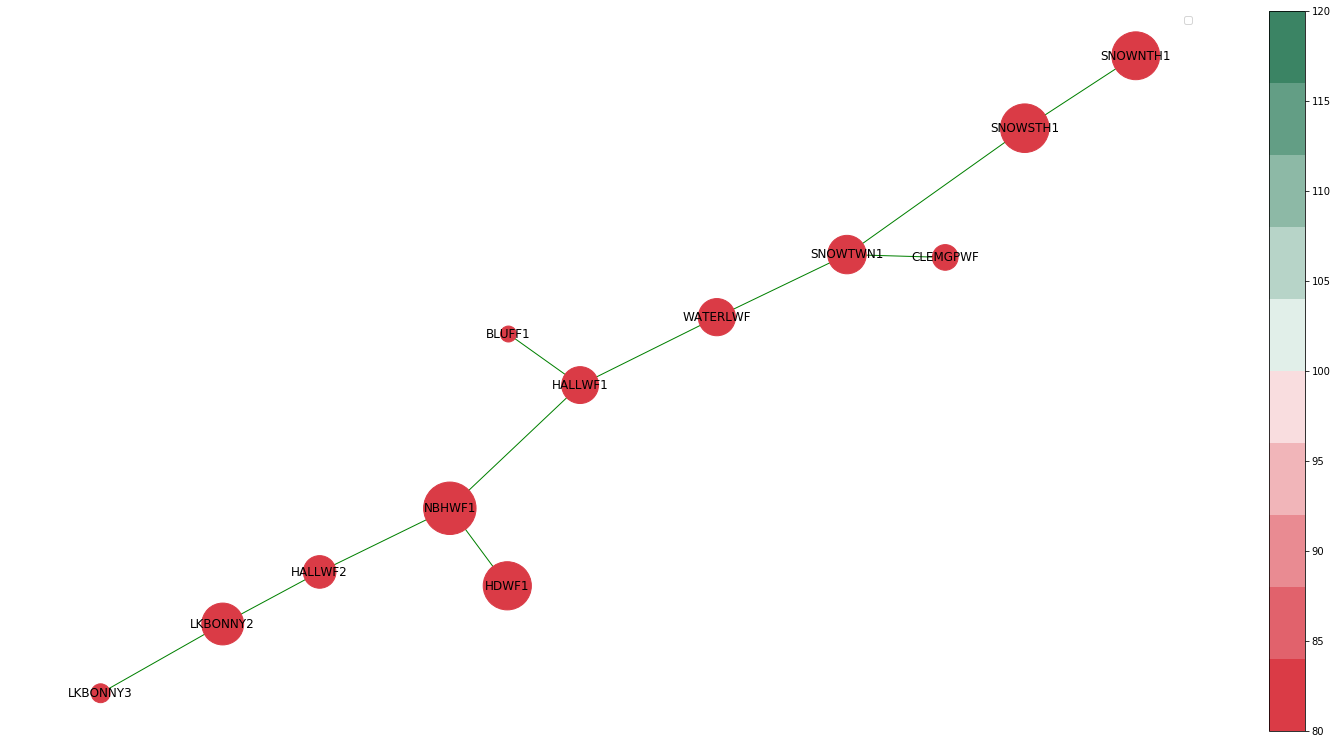

<Figure size 1440x1296 with 0 Axes>

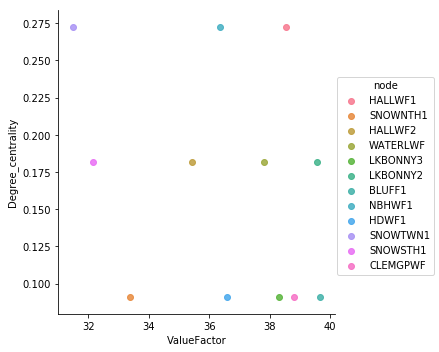

<Figure size 1440x1296 with 0 Axes>

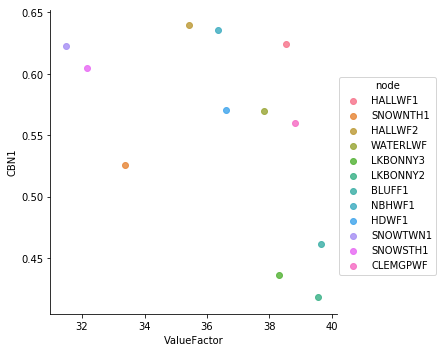

<Figure size 1440x1296 with 0 Axes>

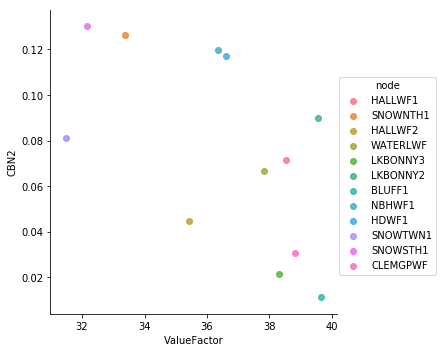

<Figure size 1440x1296 with 0 Axes>

<Figure size 457.125x360 with 0 Axes>

In [69]:
# STEP1 MST maker

# loop over all extreme times
for i,tm in enumerate(filtered_times):

    tstart=tm - dt.timedelta(days=1)
    tstart2=tm + dt.timedelta(days=1)

    year  =  tm.year
    month =  tm.month
    day   =  tm.day
    hour  =  tm.hour
    rrp   =  fprice[i]

    # saving plots here
    outpath="/mnt/y/Code/Analysis/graph/Graph_figures/CBN_testing/South Australia/"

    # load generators
#     df_all = pd.read_csv("/mnt/y/Data/Power/ECMWF/lillypond/future_wind.csv")
#     df_all=df_all.drop("time",axis=1)
#     df_all=df_all.drop("Unnamed: 0",axis=1)
#     df_all=df_all.iloc[1:,:]
#     # the 2016-01-2 -> 2016-01-3 missing behaving going to 2016-02-02 instead so hard code dates!
#     df_all.index=pd.date_range(start=dt.datetime(2008,1,1,1),end=dt.datetime(2017,12,31,23),freq="h")

    # load generators (as above)! --- > SA wind

    # Munge creates MST plot
    # works
    #df_delta,df_revenue,G = ancil_load.munge_MST(tstart,tstart2,df_all,fprice,outpath+"MST/size_prod_color_VF_{0}_{1}.png".format(tstart,tstart2))
    # NOt tested
    df_delta,df_revenue,G = ancil_load.munge_MST(tstart,tstart2,df_all,price,outpath+"MST/size_prod_color_VF_{0}_{1}.png".format(tstart,tstart2))

    
    # STEP2 analytics.
    import matplotlib.pyplot as plt
    
    # Calculate dataframe of Analytics
    df_central=ancil_load.munge_analytics_MST(G,tstart)

    import seaborn as sns

    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="Degree_centrality",hue="node",fit_reg=False)
    f.savefig(outpath+"Degree_centrality/"+"degree_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))

    
    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN1",hue="node",fit_reg=False)
    f.savefig(outpath+"CBN1/"+"CBN1_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))


    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN2",hue="node",fit_reg=False)
    f.savefig(outpath+"CBN2/"+"CBN2_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))


    f=plt.figure(figsize=(20,18))
    f=sns.lmplot(data=df_central,x="ValueFactor",y="CBN3",hue="node",fit_reg=False)
    f.savefig(outpath+"CBN3/"+"CBN3_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))
    
    
    #     # VERY VERY OPTIONAL
    
#     u,s,v=np.linalg.svd(df_delta-df_delta.mean(axis=0))
#     PC1=u[:,0]
#     PC2=u[:,1]
#     PC3=u[:,2]
#     C1=np.dot(PC1,df_delta)
#     C2=np.dot(PC2,df_delta)
#     C3=np.dot(PC3,df_delta)
#     PCA=pd.DataFrame({"PC1":C1,"PC2":C2,"PC3":C3},index=df_delta.columns)
#     PCA["gen"]=PCA.index

#     # PCA1 Vs PC2
#     f=plt.figure(figsize=(10,9))
#     f=sns.lmplot(data=PCA,x="PC1",y="PC2",hue="gen",fit_reg=False)
#     #plt.draw()
#     f.savefig(outpath+"PCA1/"+"PCA1_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))

#     # PCA1 VC PC3
#     f=plt.figure(figsize=(10,9))
#     f=sns.lmplot(data=PCA,x="PC1",y="PC3",hue="gen",fit_reg=False)
#     #plt.draw()
#     f.savefig(outpath+"PCA2/"+"PCA2_{0}{1:02d}{2:02d}_{3}_RRP_{4}.png".format(year,month,day,hour,rrp))
    

    
    plt.clf()


In [75]:
import networkx as nx

In [77]:
a=nx.edges(G)

In [79]:
list(a)

[('HALLWF1', 'WATERLWF'),
 ('HALLWF1', 'BLUFF1'),
 ('HALLWF1', 'NBHWF1'),
 ('SNOWNTH1', 'SNOWSTH1'),
 ('HALLWF2', 'LKBONNY2'),
 ('HALLWF2', 'NBHWF1'),
 ('WATERLWF', 'SNOWTWN1'),
 ('LKBONNY3', 'LKBONNY2'),
 ('NBHWF1', 'HDWF1'),
 ('SNOWTWN1', 'SNOWSTH1'),
 ('SNOWTWN1', 'CLEMGPWF')]

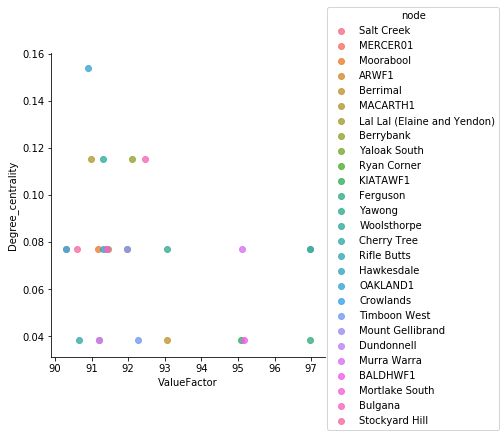

In [111]:
import seaborn as sns
# Degree_centrlaity
a=sns.lmplot(data=df_central,x="ValueFactor",y="Degree_centrality",hue="node",fit_reg=False)
#df.plot.bar(x="node",y="katz")

### 2. Wind and TEMP

In [13]:
# wind base name
basefn="/mnt/y/Data/Weather/ECMWF/Data_R/ml/{0}/{1:02d}/era5_hourly_ml_AUS_{0}{1:02d}.nc"

for i,tm in enumerate(price.index):
    ancil_load.Cartopy_Earth_wind(tm,"t",price[i],basefn)

/mnt/y/Code/Analysis/graph/ancil_load.py:423: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/peterad/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/peterad/.local/lib

ImportError: No module named crs

### 3. Add MST lines, add labels of projects

In [73]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import ancil_load
# import datetime as dt
# ancil_load=reload(ancil_load)

# # load price and production
# df_all_ancil,price = ancil_load.SA_production_price()
# df_all_ancil["index"]=df_all_ancil.index
# df_all_ancil=df_all_ancil.drop_duplicates("index")
# df_all_ancil=df_all_ancil.drop("index",axis=1)
# df_all_ancil=df_all_ancil.fillna(0)

# price=pd.DataFrame(price)
# price["index"]=price.index
# price=price.drop_duplicates("index")
# price=price.drop("index",axis=1)
# #price=pd.Series(price)
# price=price.iloc[1::2,0]

# #------
# ftimes,fprice = ancil_load.subset_pricefilter(price)
# filtered_times = ftimes

# filtered_times=filtered_times[filtered_times.year==2017]
# filtered_times=filtered_times[filtered_times.month==1]

# #-----
# # STEP1 MST maker

# # loop over all extreme times
# for i,tm in enumerate(filtered_times):

#     tstart=tm - dt.timedelta(days=1)
#     tstart2=tm + dt.timedelta(days=1)

#     year  =  tm.year
#     month =  tm.month
#     day   =  tm.day
#     hour  =  tm.hour
#     rrp   =  fprice[i]

#     # saving plots here
#     outpath="/mnt/y/Code/Analysis/graph/Graph_figures/CBN_testing/South Australia/"
#     df_delta,df_revenue,G = ancil_load.munge_MST(tstart,tstart2,df_all,price,outpath+"MST/size_prod_color_VF_{0}_{1}.png".format(tstart,tstart2))


# #----------------------
# def mkdir_p(mypath):
#     '''Creates a directory. equivalent to using mkdir -p on the command line'''

#     from errno import EEXIST
#     from os import makedirs,path

#     try:
#         makedirs(mypath)
#     except OSError as exc: # Python >2.5
#         if exc.errno == EEXIST and path.isdir(mypath):
#             pass
#         else: raise

# #-----------------------------

# import datetime
# tm=datetime.datetime(2017,1,1,1,30)
# var="wind"
# rrp=5
# basefn="/mnt/y/Data/Weather/ECMWF/Data_R/ml/{0}/{1:02d}/era5_hourly_ml_AUS_{0}{1:02d}.nc"


# import matplotlib
# matplotlib.use('Agg') #https://stackoverflow.com/questions/37604289/tkinter-tclerror-no-display-name-and-no-display-environment-variable

# from netCDF4 import Dataset, MFDataset, num2date
# import matplotlib.pylab as plt
# import numpy as np
# from matplotlib import cm
# import cartopy.crs as ccrs
# import pandas as pd
# import sys
# import os
# from cartopy.util import add_cyclic_point

# ## Wind

# year  =  tm.year
# month =  tm.month
# day   =  tm.day
# hour  =  tm.hour

# tind = (day-1)*24+hour
# basefn=basefn.format(year,month)

# base = "/mnt/y/Data/Weather/ECMWF/Saved_plots/wind_temp/SA_extreme98_update/{0}/{1:02d}/".format(year,month)
# mkdir_p(base)

# flf = Dataset(basefn)
# lat = flf.variables['latitude'][:]
# lon = flf.variables['longitude'][:]

# u = flf.variables["u100"][tind,:,:]
# v = flf.variables["v100"][tind,:,:]
# temp=flf.variables["t"][tind,:,:]


# crs_latlon=ccrs.PlateCarree()
# plt.figure(figsize=(13,6.2))

# ax = plt.subplot(111, projection=crs_latlon)

# mm = ax.pcolormesh(lon,\
#                    lat,\
#                    temp,\
#                    vmin=273,\
#                    vmax=310,\
#                    transform=ccrs.PlateCarree(),cmap="RdBu_r" )
# plt.colorbar(mm)
# ax.coastlines();

#     #ax.quiver(lon,lat,u,v,transform=crs_latlon, headwidth=1, scale =1.0 headlength=4)
# skip=(slice(None,None,8),slice(None,None,8))
# q=ax.quiver(lon[::8],lat[::8],u[skip],v[skip],color="black",transform=crs_latlon, headwidth=20, headlength=10)
# ax.quiverkey(q,X=.3,Y=1.1,U=10,label="Length = 10 ms-1",labelpos='E')


# ## add Existing points
# ps=pd.read_csv("/mnt/y/Data/Electricity/Generation Trading load/MajorPowerStations_v2.csv")
# ps_wind=ps[ps["GENERATIONTYPE"]=="Wind Turbine"]


# for i,p in enumerate(ps.index):
#     LAT=ps.iloc[i,:]["LATITUDE"]
#     LON=ps.iloc[i,:]["LONGITUDE"]
#     plt.plot([LON],[LAT],color='red',marker="o",markersize=4)#,transform=crs_latlon)

# for i,p in enumerate(ps_wind.index):
#     LAT=ps_wind.iloc[i,:]["LATITUDE"]
#     LON=ps_wind.iloc[i,:]["LONGITUDE"]
#     plt.plot([LON],[LAT],color='green',marker="o",markersize=4,)#,transform=crs_latlon)

    
# # Transfer DUID

# DUID={
#     HALLWF1:
#     HALLWF2:
#     NBHWF1:
#     BLUFF1:
#     WPWF:"Wattle Point Wind Farm"
#     CNUNDAWF:"Canunda Wind Farm"
#     CATHROCK:"Cathedral Rocks Wind Farm"
#     HPRG1:
#     HDWF2:
#     HDWF1:
#     HDWF3:
#     LKBONNY2:
#     LKBONNY3:
#     LKBONNY1:
#     MTMILLAR:
#     CLEMGPWF:
#     SNOWTWN1:
#     SNOWSTH1:
#     SNOWNTH1:
#     STARHLWF:
#     WATERLWF:"Waterloo Wind Farm"
# }

    
# # add in edge


# edge=list(nx.edges(G))

    
    

# # SA bounary coordinates
# ax.set_extent((125, 141, -25, -39), crs=crs_latlon)
# # Victoria Coordinates
# #ax.set_extent((140,150,-33,-40), crs=crs_latlon)


# plt.savefig(base+"era5_VIC_{1}{2:02d}{3:02d}_{4}_RRP_{5}.png".format(var,year,month,day,hour,rrp))
# plt.close()

/home/peterad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:25: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/peterad/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/peterad/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  F

ImportError: No module named crs